<a href="https://colab.research.google.com/github/Battula-Shilpa/-Machine-Learning/blob/main/3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DECISION TREE**

**Steps Covered**:
- Load the dataset.
- Data preprocessing (handle categorical values, missing values, etc.).
- Split data into training and testing sets.
- Train a Decision Tree Classifier.
- Evaluate model accuracy.
- Visualize the decision tree.


# Code

In [113]:
#Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [114]:
#from kaggle
!kaggle datasets download -d pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

Dataset URL: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
License(s): unknown
drugs-a-b-c-x-y-for-decision-trees.zip: Skipping, found more recently modified local copy (use --force to force download)


In [115]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drugs-a-b-c-x-y-for-decision-trees.zip')
zip_ref.extractall('drug_data')
zip_ref.close()

In [116]:
#Load the dataset
df = pd.read_csv("/content/drug_data/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Data Preprocessing

In [117]:
#Check null values
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [118]:
#check duplicates
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [120]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [121]:
df.shape

(200, 6)

In [122]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Sex
M    104
F     96
Name: count, dtype: int64


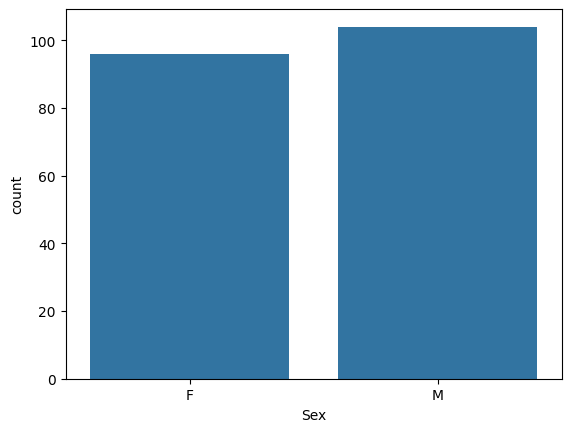

In [124]:
x = df['Sex'].value_counts()
print(x)
p = sns.countplot(x=df['Sex'])
plt.show()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


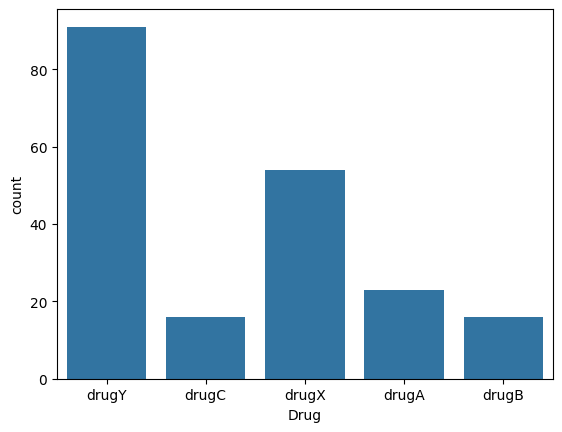

In [125]:
x = df['Drug'].value_counts()
print(x)
p = sns.countplot(df, x = 'Drug' )
plt.show()

In [126]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

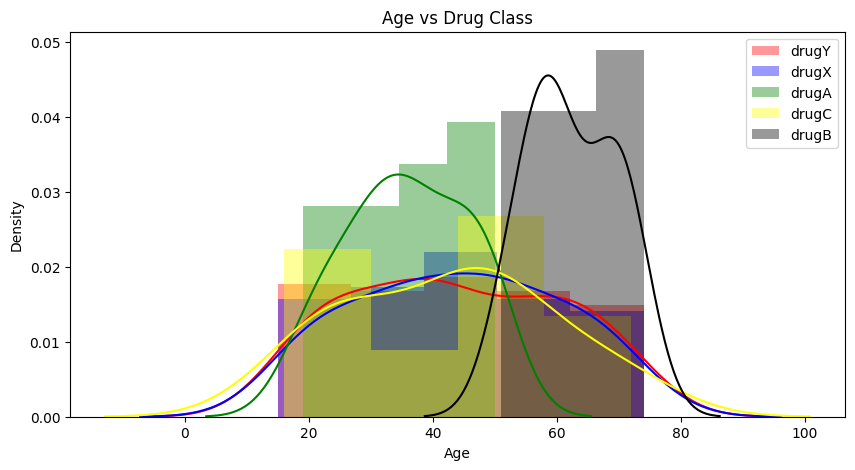

In [127]:
#create the graph
plt.figure(figsize=(10,5))
sns.distplot(df[df['Drug']=='drugY']['Age'],color = 'red',label = 'drugY')
sns.distplot(df[df['Drug']=='drugX']['Age'],color = 'blue',label = 'drugX')
sns.distplot(df[df['Drug']=='drugA']['Age'],color = 'green',label = 'drugA')
sns.distplot(df[df['Drug']=='drugC']['Age'],color = 'yellow',label = 'drugC')
sns.distplot(df[df['Drug']=='drugB']['Age'],color = 'black',label = 'drugB')
plt.legend()
plt.title('Age vs Drug Class')
plt.show()

In [128]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[['BP', 'Sex', 'Cholesterol', 'Drug']] = oe.fit_transform(df[['BP', 'Sex', 'Cholesterol', 'Drug']])

In [129]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [130]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [131]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [132]:
y

,Drug
0,4.0
1,2.0
2,2.0
3,3.0
4,4.0
...,...
195,2.0
196,2.0
197,3.0
198,3.0


# train test split

In [133]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [134]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
172,39,0.0,2.0,1.0,17.225
96,58,0.0,1.0,0.0,38.247
148,61,0.0,1.0,1.0,7.340
159,34,0.0,1.0,1.0,12.923
10,47,0.0,1.0,0.0,11.767
...,...,...,...,...,...
66,29,1.0,0.0,0.0,12.856
6,49,0.0,2.0,0.0,16.275
40,73,0.0,2.0,0.0,19.221
45,66,0.0,2.0,1.0,8.107


In [135]:
y_train

,Drug
172,4.0
96,4.0
148,3.0
159,3.0
10,2.0
...,...
66,0.0
6,4.0
40,4.0
45,3.0


# Decision tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state = 0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [137]:
y_pred_gini = dt.predict(X_test)

In [138]:
y_pred_gini

array([4., 4., 3., 4., 4., 4., 4., 3., 3., 3., 4., 3., 4., 0., 4., 1., 3.,
       3., 4., 1., 4., 1., 0., 1., 0., 1., 3., 4., 3., 4., 3., 4., 3., 3.,
       3., 3., 0., 4., 3., 3.])

In [139]:
from sklearn.metrics import accuracy_score
print('Accuracy Score :',accuracy_score(y_test,y_pred_gini))

Accuracy Score : 1.0


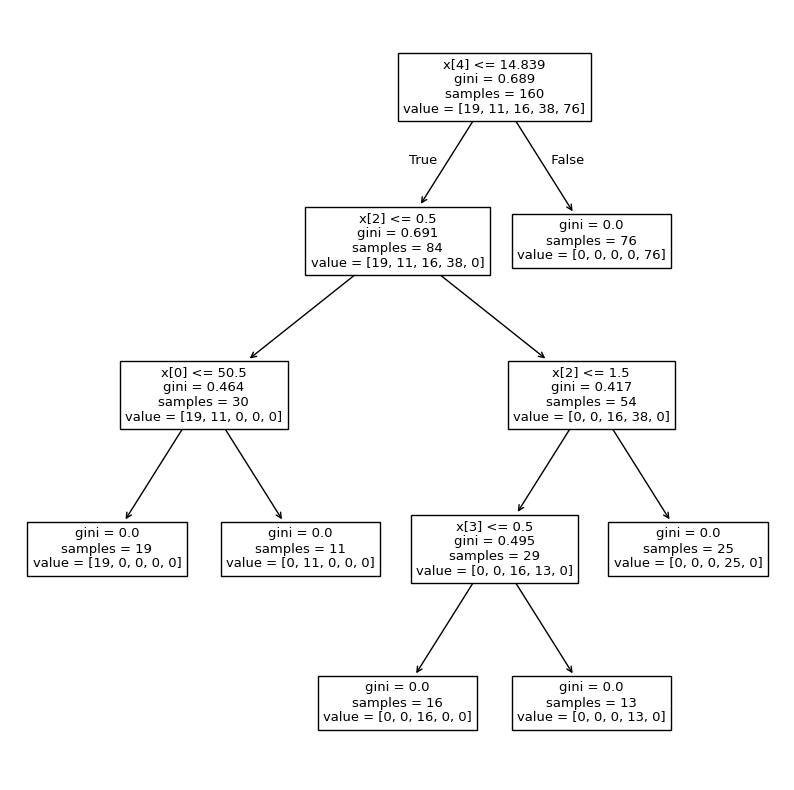

In [140]:
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(dt.fit(X_train,y_train))
plt.show()

In [141]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [150]:
y_pred_entropy = clf_entropy.predict(X_test)

Accuracy Score(Entropy) : 0.875


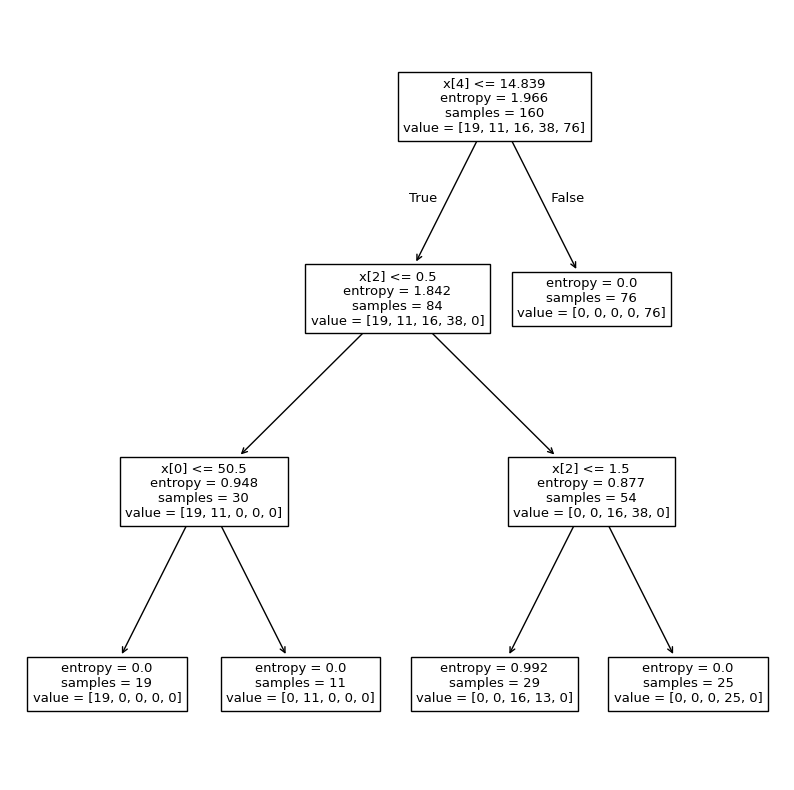

In [151]:
print('Accuracy Score(Entropy) :',accuracy_score(y_test,y_pred_entropy))
plt.figure(figsize = (10,10))
tree.plot_tree(clf_entropy.fit(X_train,y_train))
plt.show()

In [144]:
from sklearn.preprocessing import LabelEncoder

le_drug = LabelEncoder()

# Predictions
y_pred_gini = dt.predict(X_test)

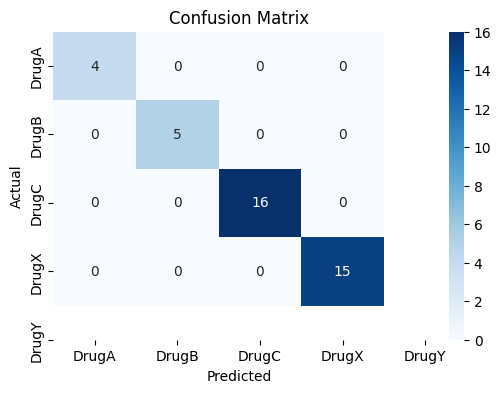

In [152]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(6, 4))
class_labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]  # Replace with actual drug names
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


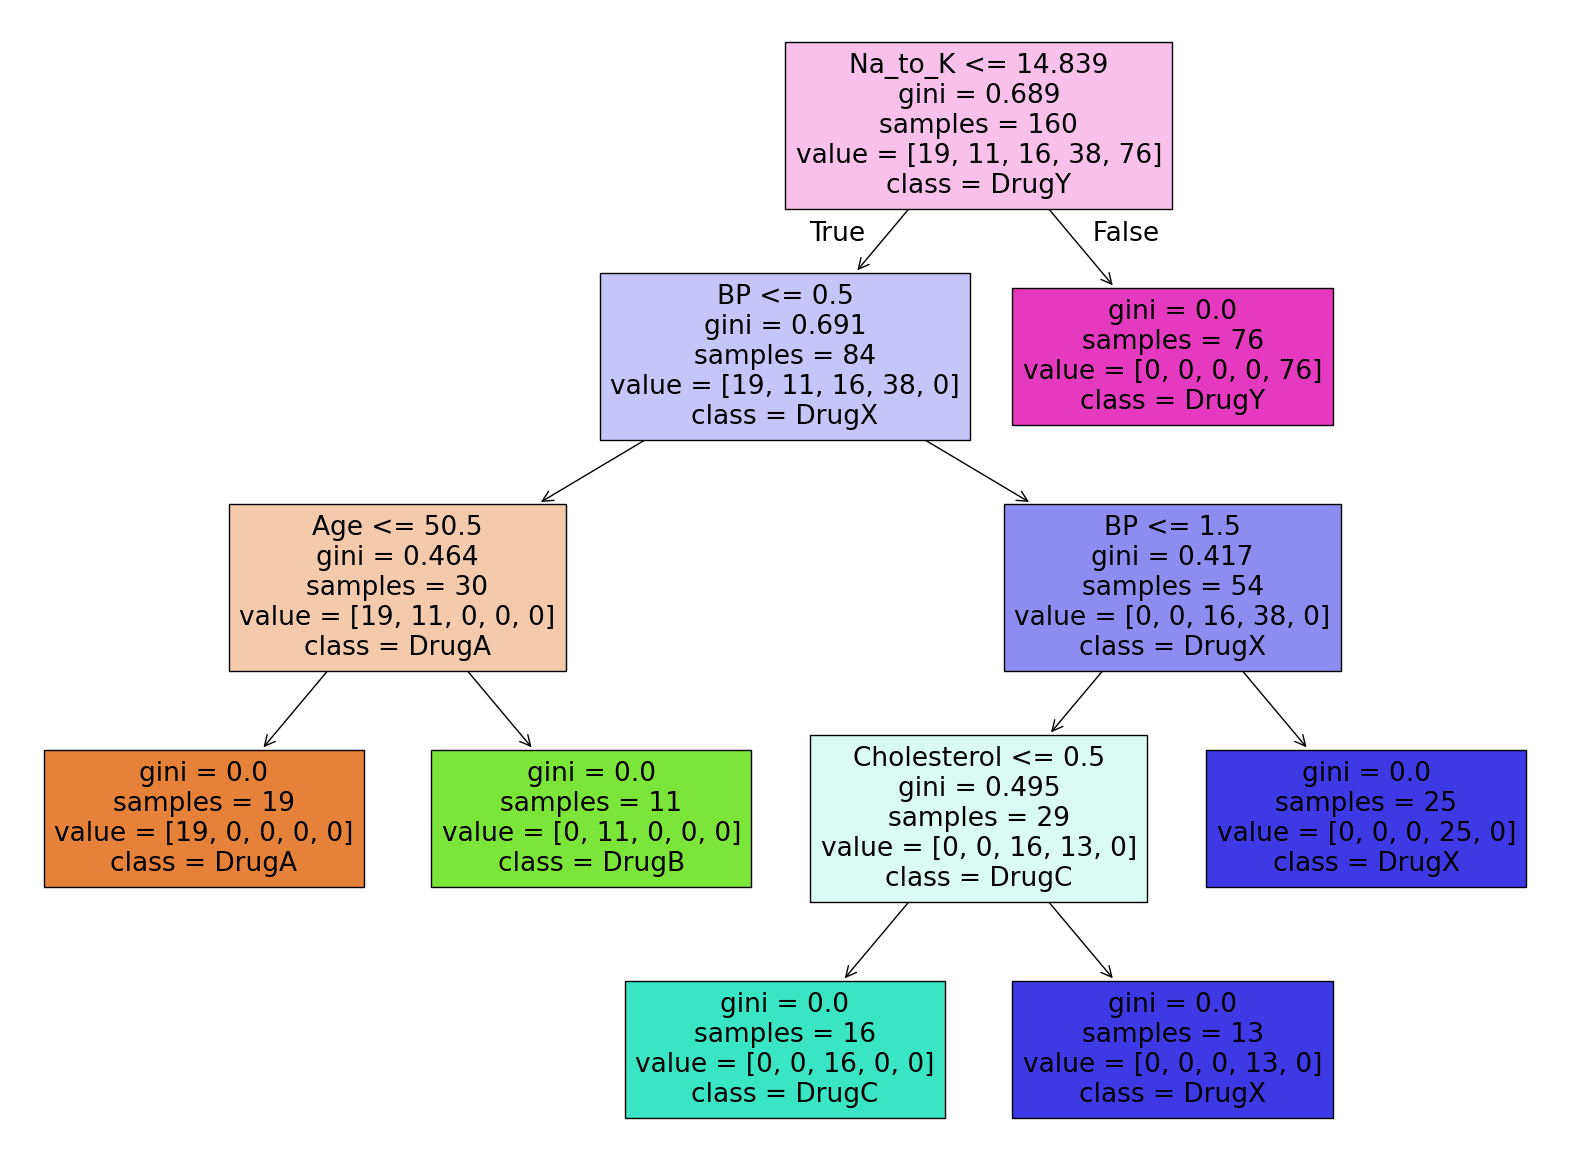

In [149]:
class_labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]  # Replace with actual labels
plt.figure(figsize=(20, 15))
plot_tree(dt, feature_names=x.columns, class_names=class_labels, filled=True)
plt.show()